# Credit Card Fraud Detection

**Problem Statement**  :  
  
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

 In this project, we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

**Understanding and defining fraud** :



  Credit card fraud is any dishonest act or behaviour to obtain information without proper authorisation from the account holder for financial gain. Among different ways of committing frauds, skimming is the most common one, which is a way of duplicating information that is located on the magnetic strip of the card. Apart from this, following are the other ways


* Manipulation/alteration of genuine cards
* Creation of counterfeit cards
* Stealing/loss of credit cards

* Fraudulent telemarketing




 **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modules for data cleaning and data analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

#modules for model building
#algorithms for sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#baseline linear model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#modules for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#modules for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, f1_score, r2_score
from sklearn.metrics import precision_recall_curve, roc_curve
#modules for avoiding warnings
import warnings
warnings.filterwarnings('ignore')

#setting backend for matplotlib
%matplotlib inline

#setting formatting options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 900
pd.set_option('float_format' , '{:f}'.format)

#setting plot style
plt.style.use('seaborn-darkgrid')

 **Read data**

In [ ]:
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
197641,132110.000000,-0.544482,-0.269663,0.188006,-1.277452,0.149021,-0.514235,0.637528,-0.542436,-0.870279,0.939955,-0.811321,-1.728039,-1.160318,-0.095426,0.626415,0.417492,0.508810,-1.490809,1.779355,-0.186208,-0.085696,-0.027857,-0.157200,0.668714,-0.823674,-0.406865,-0.221221,-0.055021,119.900000,0
86402,61219.000000,1.501219,-0.961673,0.475037,-1.448639,-1.483854,-0.704370,-1.034555,-0.095144,-2.092962,1.617680,1.206728,-0.229150,0.340193,-0.099719,-0.126633,-0.202510,0.260815,0.460632,0.050390,-0.347499,-0.171360,-0.110895,0.034431,0.316358,0.360042,-0.222498,0.028009,0.008533,1.000000,0
137195,82059.000000,-1.046901,1.334527,0.452793,0.725173,0.452799,-0.465450,0.379422,0.215846,-0.670045,-0.035260,-1.183122,0.423778,1.455711,0.268973,0.943033,-0.039144,-0.408866,0.246558,0.717121,0.074878,0.134130,0.407207,-0.234893,-0.415711,-0.042658,-0.291997,0.044184,0.148316,2.410000,0
33366,37202.000000,1.065501,-0.160963,1.267443,1.180655,-0.771530,0.587421,-0.767499,0.399781,0.689298,-0.065494,1.058657,1.040867,-0.473311,-0.054595,-0.225689,0.001689,-0.198412,0.034379,-0.276708,-0.179130,0.012468,0.219681,0.016814,0.017397,0.298556,-0.395547,0.082383,0.023965,9.990000,0
66321,51992.000000,1.326568,-0.765102,0.019486,-1.000338,-0.620254,-0.047906,-0.645704,0.055318,-0.845064,0.774874,0.342653,-0.647694,-0.462952,0.141638,0.293024,1.817835,-0.411618,-0.595944,1.323811,0.193007,-0.092139,-0.595706,-0.066158,-0.869841,0.306880,-0.430617,-0.011942,0.009787,70.420000,0
70790,54022.000000,-2.811616,-1.571707,-0.195544,-0.138794,4.132259,2.399468,-1.153095,1.522323,-0.541316,-0.932615,-0.933083,0.219054,-0.231057,0.516280,-0.640237,0.165698,-0.494745,0.134814,-0.136818,0.589978,0.131312,-0.681517,-0.391858,1.019636,0.895351,-0.429185,-0.039546,-0.394032,11.650000,0
75450,56075.000000,0.817385,-0.354776,-0.161674,1.339965,-0.141499,-0.264898,0.489715,-0.127825,-0.224617,0.064338,0.781388,0.958998,-0.005813,0.450787,-0.672452,-0.060362,-0.484617,0.194685,0.218385,0.287124,0.122382,0.010770,-0.385745,0.040123,0.781072,-0.280611,-0.033793,0.036893,212.200000,0
270131,163931.000000,-3.873690,1.582809,-0.921121,0.210598,0.119911,5.080881,-2.206659,3.104371,0.600571,-0.403876,-1.382804,0.895388,0.030536,0.363848,-0.290684,-0.178962,0.817068,0.197036,0.781695,-0.305840,0.114173,-0.009734,-0.348376,0.719748,0.552008,-0.448962,-1.240887,-0.225350,50.000000,0
62039,50095.000000,-0.362189,0.420089,2.045004,-0.288425,-0.554494,0.238739,-0.231434,0.225146,0.236220,-0.343975,0.682774,0.876345,0.361268,-0.411817,-0.314835,0.049653,-0.229535,0.428017,1.452490,0.081994,0.058323,0.315335,-0.056387,0.104507,-0.819344,0.972964,-0.011810,0.147430,0.000000,0
271913,164807.000000,0.076601,1.580315,-1.875839,-0.013404,0.873678,-1.229704,0.534853,0.319277,-0.324504,-1.470508,1.228978,0.126090,-0.164591,-2.157827,0.172037,1.083477,1.576133,2.112643,-0.111014,-0.051271,0.201573,0.697665,-0.193500,-0.633151,-0.188584,-0.126120,0.194610,0.039187,1.000000,0



**Data Analysis**

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Data pre-processing**

In [ ]:
#Check for duplicate entries

if df.duplicated().any():
    print("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates exist


In [ ]:
df = df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#check missing value

In [ ]:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.000000
V16,0,0.000000
Amount,0,0.000000
V28,0,0.000000
V27,0,0.000000
V26,0,0.000000
V25,0,0.000000
V24,0,0.000000
V23,0,0.000000
V22,0,0.000000


**data visualization**

<Axes: ylabel='count'>

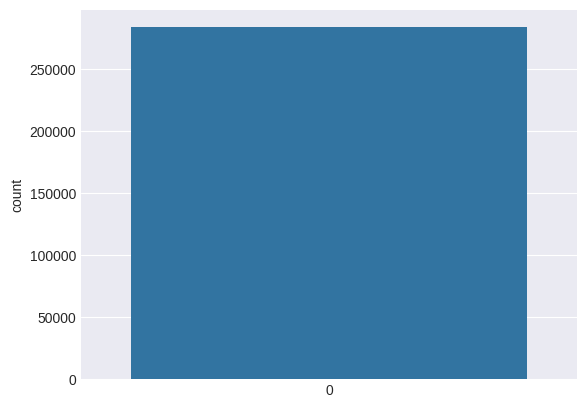

In [ ]:
sns.countplot(df['Class'])

In [ ]:
#99% transaction are mostly NonFraud only 1% transactions are fraudulent it means dataset is not complete.
#We might get errors by using this dataset because it will assume most of the transaction as Non fraudulent.

print(f"Non fraudulent transactions:{round(df['Class'].value_counts()[0]/len(df['Class'])*100,2)}%")
print(f" fraudulent transactions:{round(df['Class'].value_counts()[1]/len(df['Class'])*100,2)}%")

Non fraudulent transactions:99.83%
 fraudulent transactions:0.17%


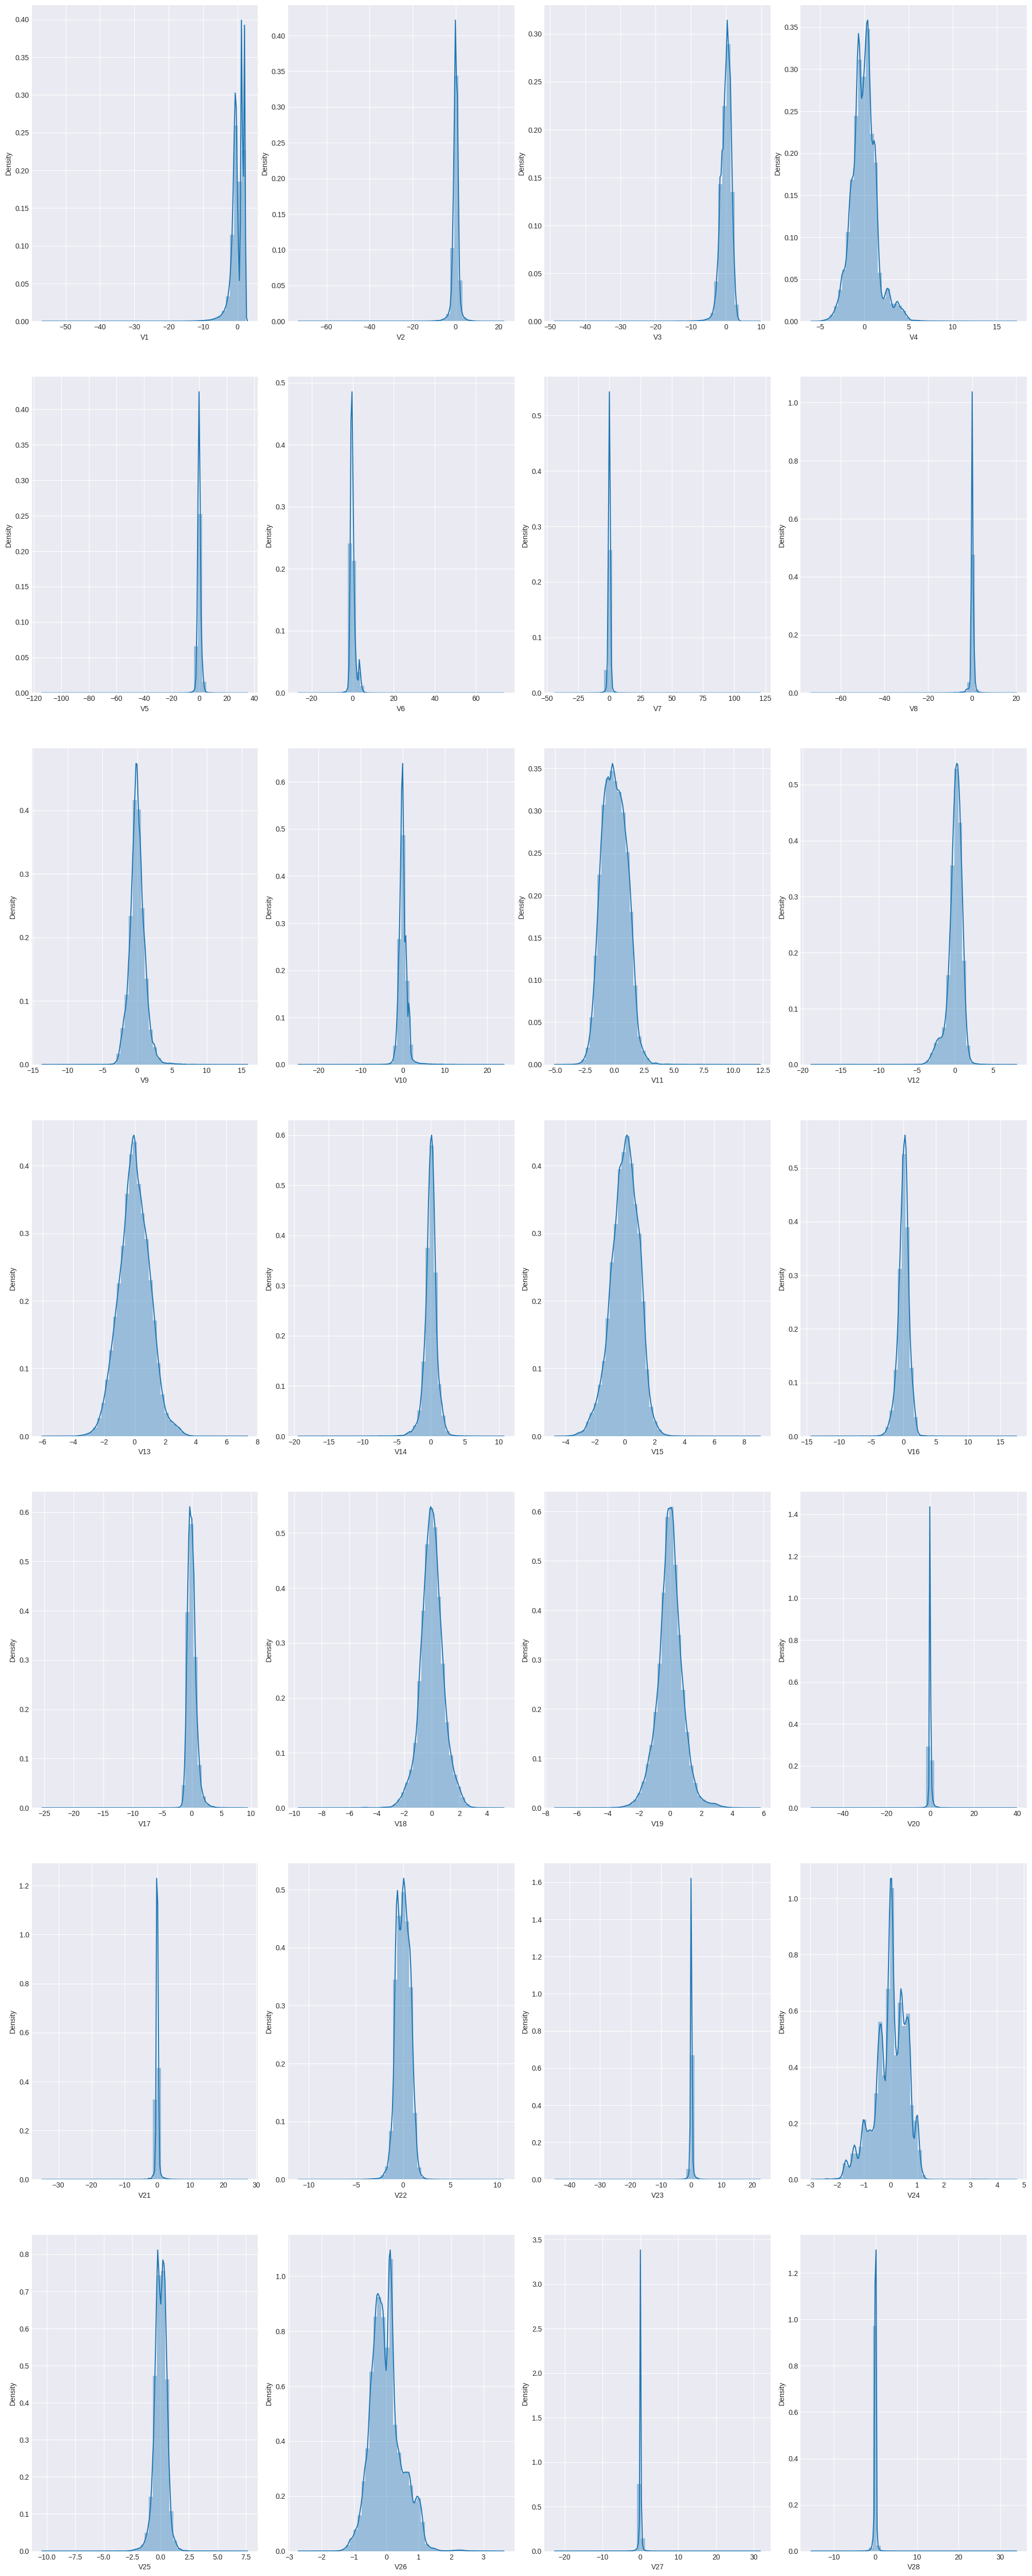

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# to create dist plot
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: xlabel='Amount', ylabel='Density'>

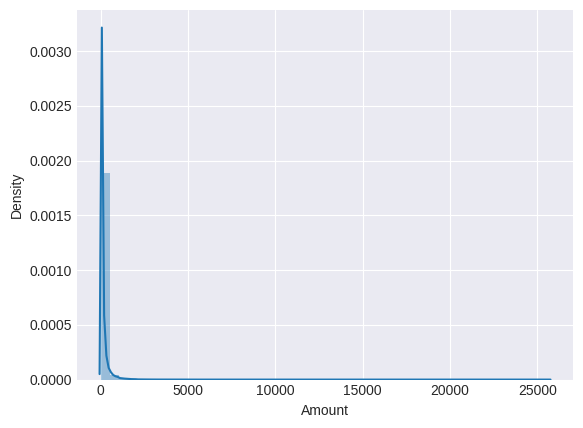

In [ ]:
#for the amount
sns.distplot(df['Amount'])

<Axes: xlabel='Time', ylabel='Density'>

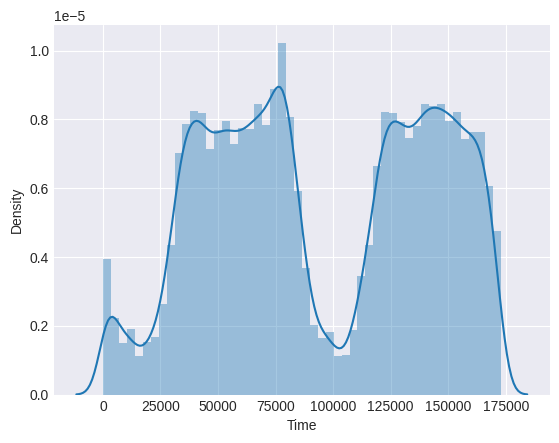

In [ ]:
#for the time
sns.distplot(df['Time'])

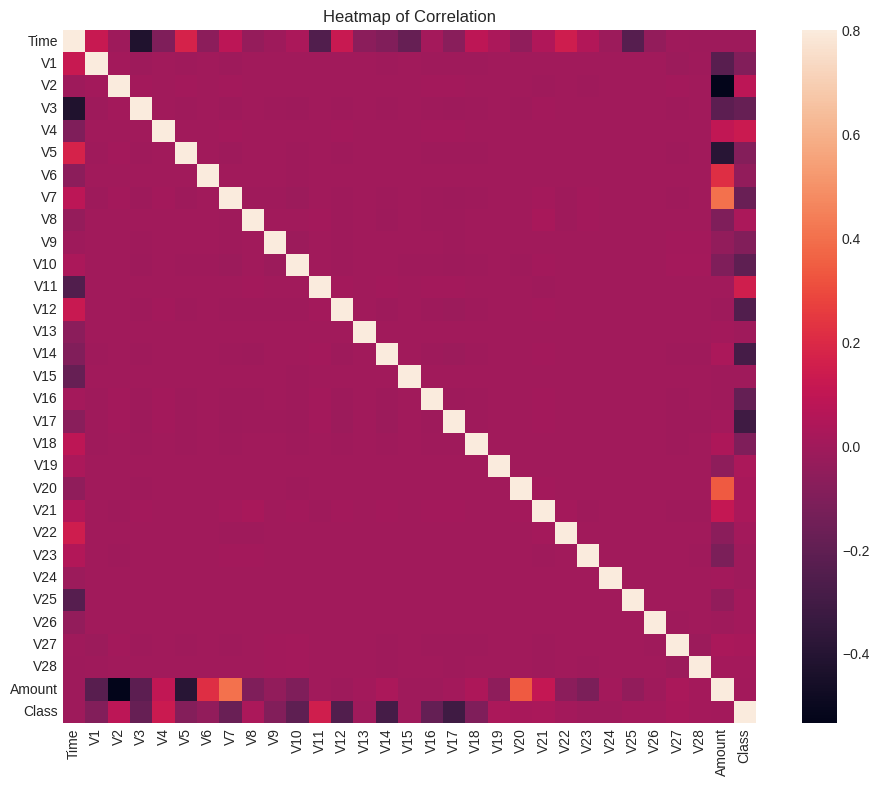

In [ ]:
#coorelation matrix
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.title('Heatmap of Correlation')
plt.show()

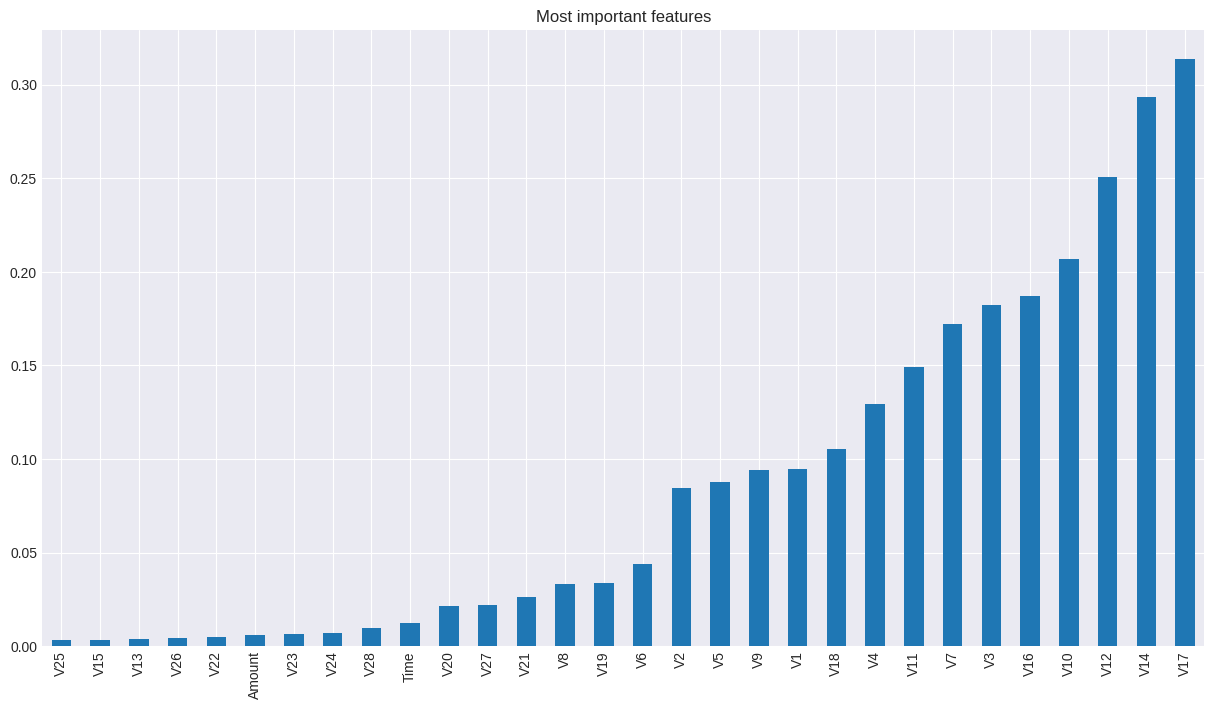

In [ ]:
plt.figure(figsize=(15,8))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Most important features')

plt.show()

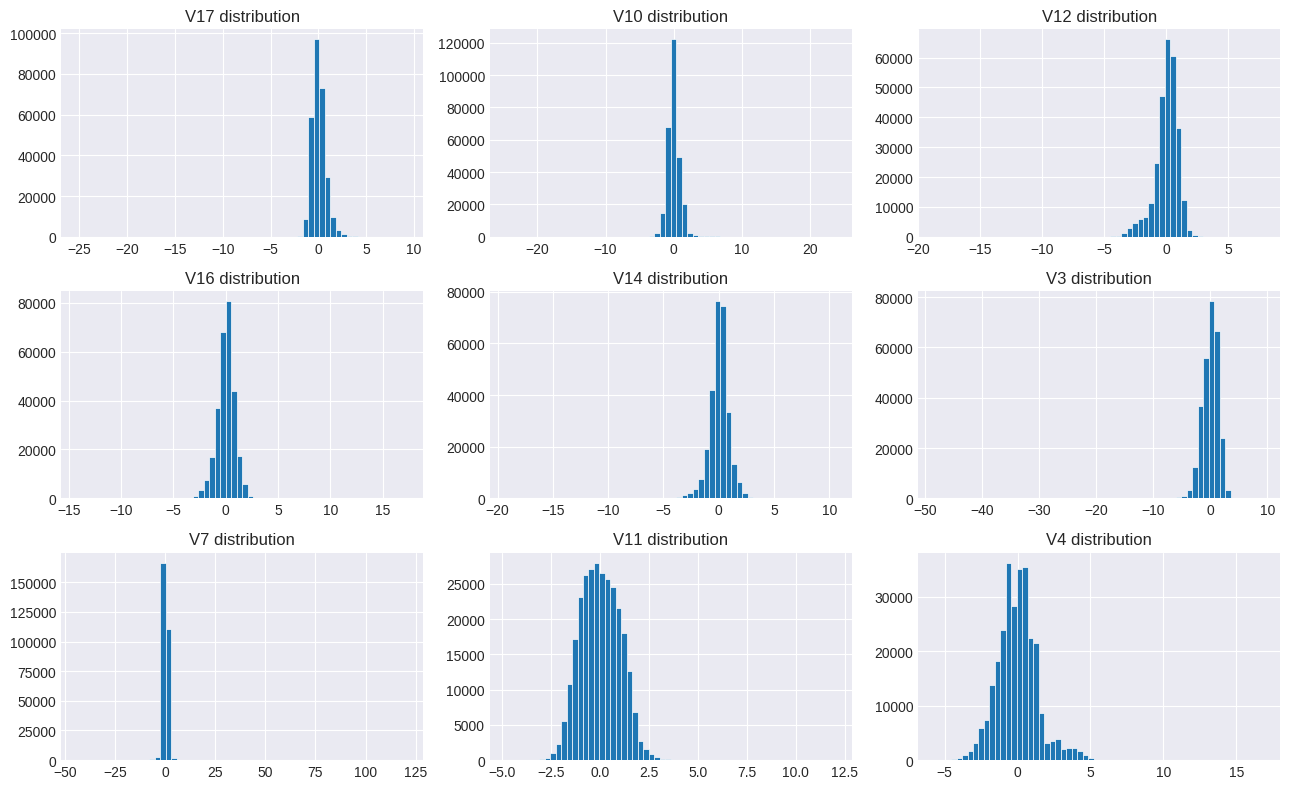

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(13,8))

axes[0,0].hist(df['V17'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("V17 distribution");

axes[0,1].hist(df['V10'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("V10 distribution");

axes[0,2].hist(df['V12'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("V12 distribution");

axes[1,0].hist(df['V16'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("V16 distribution");

axes[1,1].hist(df['V14'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("V14 distribution");

axes[1,2].hist(df['V3'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,2].set_title("V3 distribution");

axes[2,0].hist(df['V7'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,0].set_title("V7 distribution");

axes[2,1].hist(df['V11'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,1].set_title("V11 distribution");

axes[2,2].hist(df['V4'], bins=60, linewidth=0.5, edgecolor="white")
axes[2,2].set_title("V4 distribution");

plt.tight_layout()

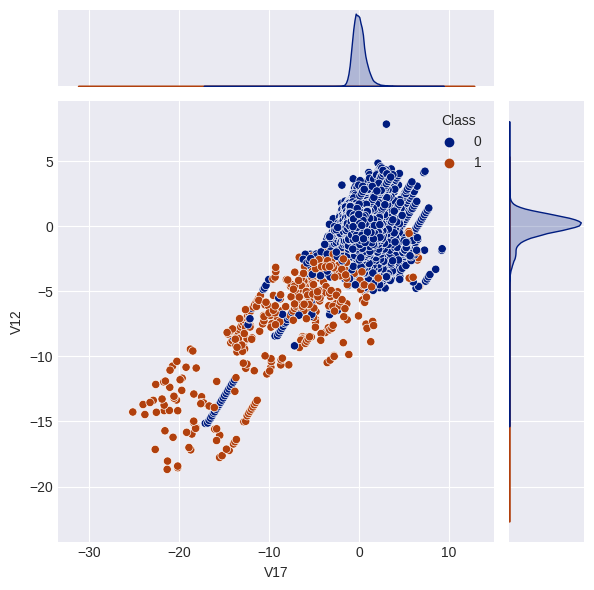

In [ ]:
sns.jointplot(x='V17', y='V12',hue='Class', data=df, palette = 'dark')

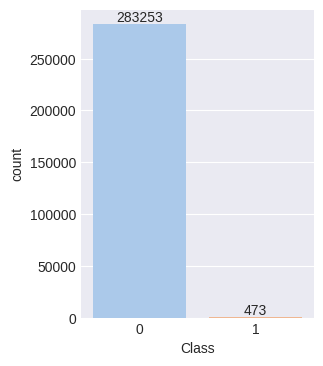

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
a=df.corr().abs()>0.3

<Axes: >

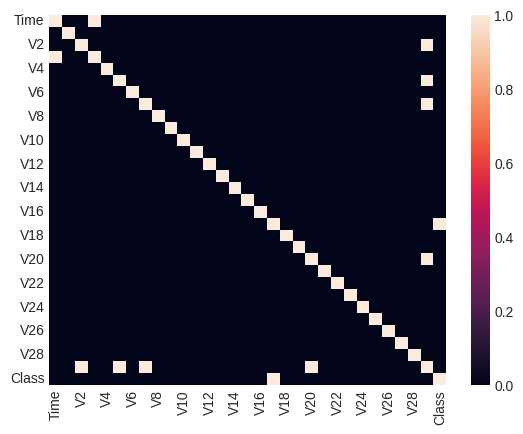

In [ ]:
sns.heatmap(a)


99,8% Accuracy score before implementing any


1.  we have 99,8% of Genuine transactions and only 0,173% (492) of fraud transactions
2. which means that a blind guess (bet on Genuine) would give us accuracy of 99,8%.



*Correlation Matrix*

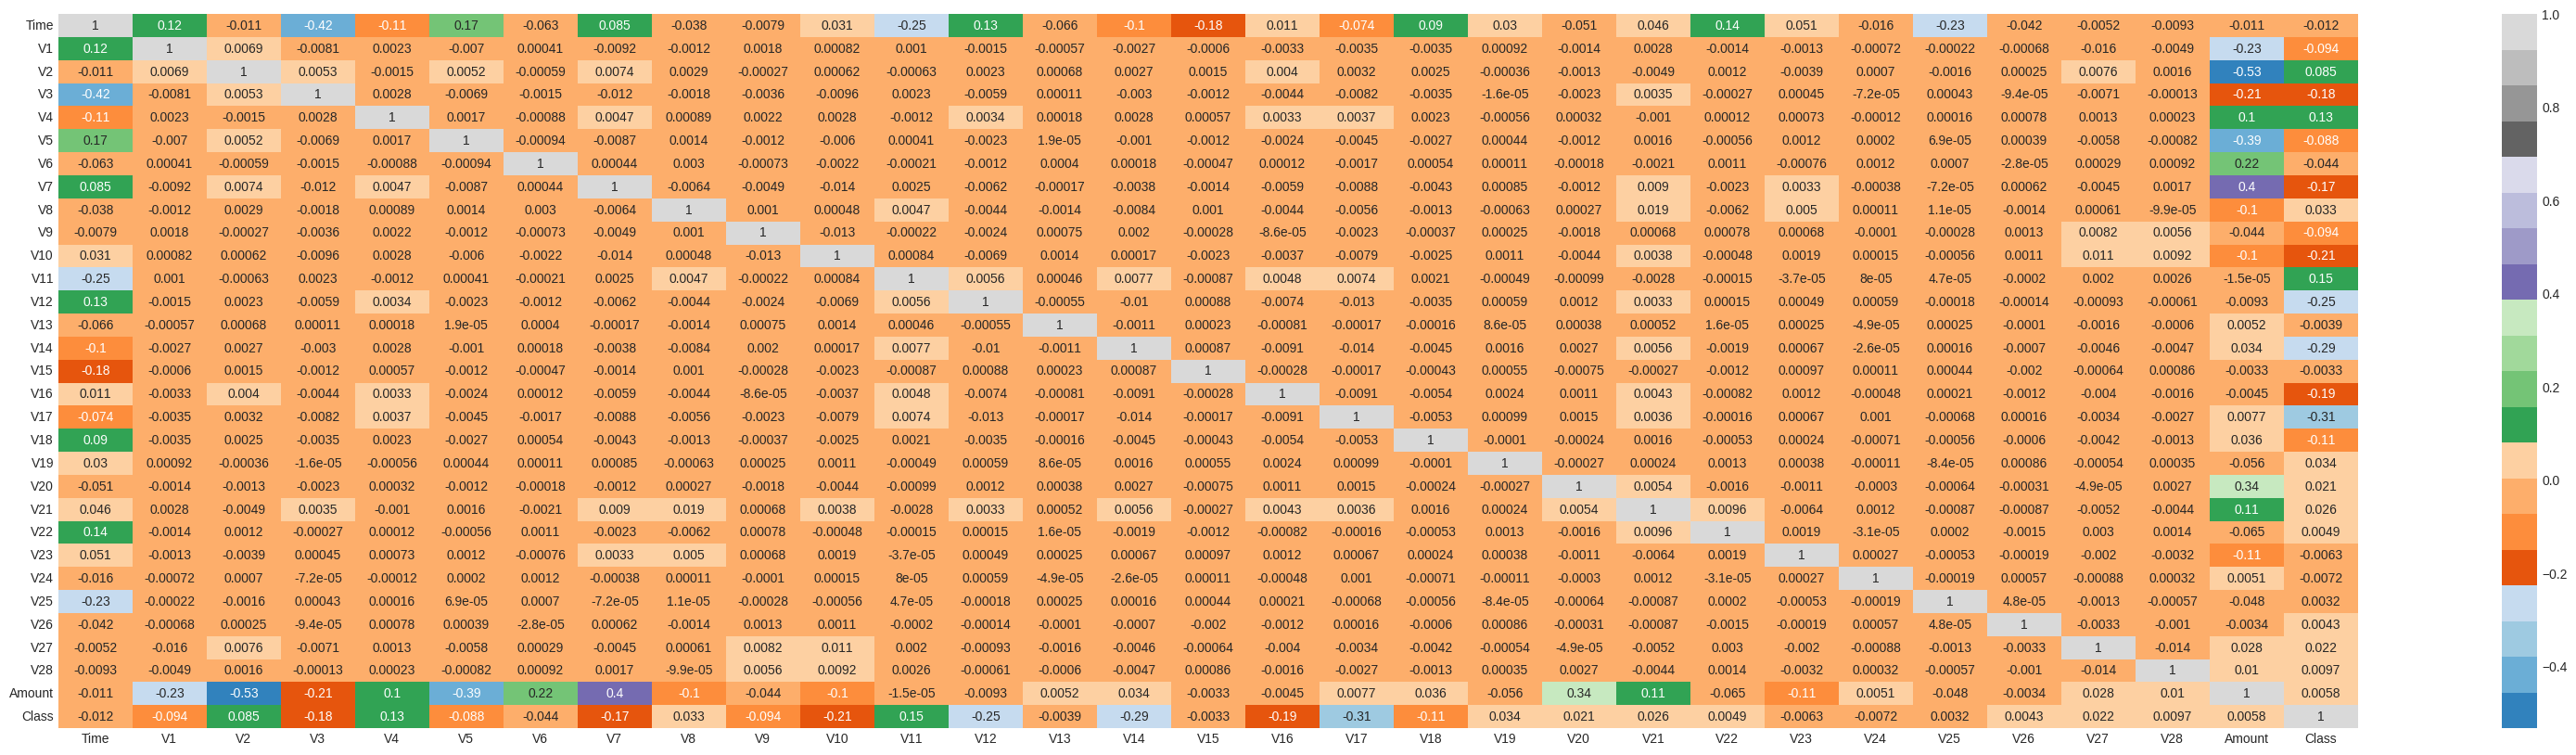

In [ ]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

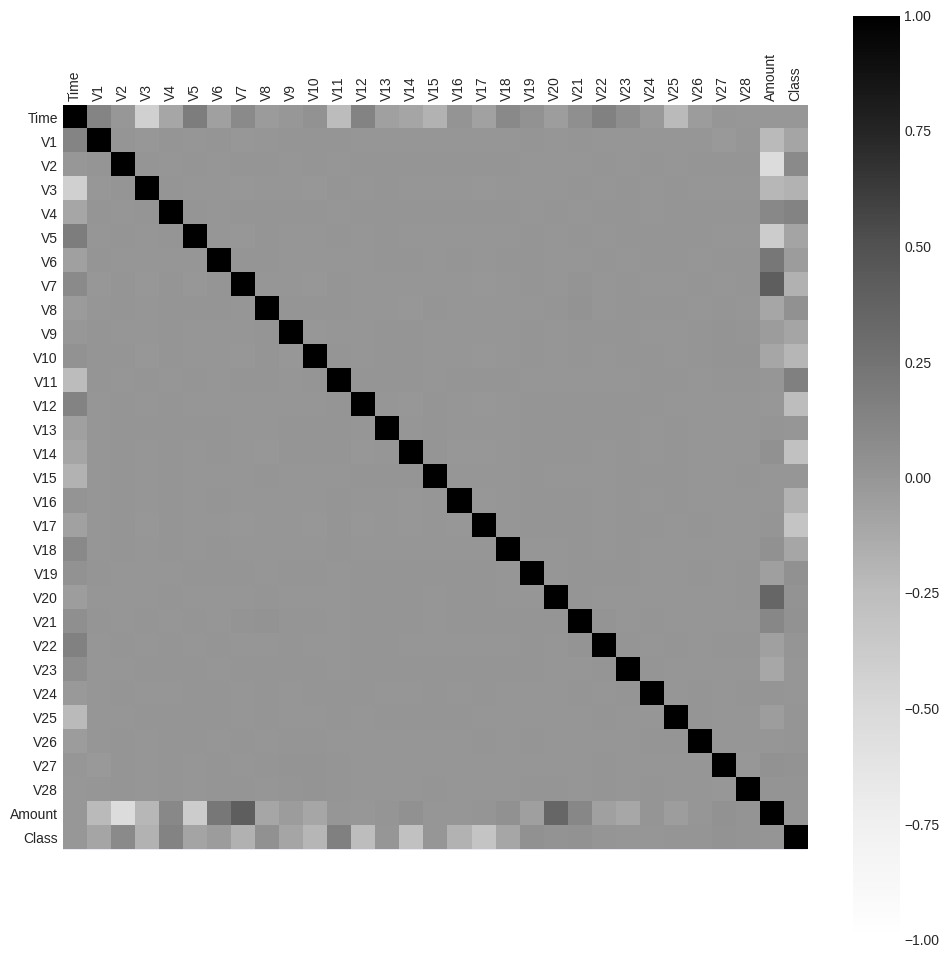

In [ ]:
# Correlation
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.columns)
plt.show()

 **Data splitting**

In [ ]:
# Putting the feature variable into X

X = df.drop(['Class'],axis = 1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000


In [ ]:
# Splitting the dataset into train and test sets

X = df.iloc[:, :-1].to_numpy()
y = df['Class'].to_numpy()

In [ ]:
# Split dataset into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (226980, 30)
X_test: (56746, 30)
y_train: (226980,)
y_test: (56746,)


**Data pre-processing**

In [ ]:
#Check for duplicate entries
if df.duplicated().any():
    print("Duplicates exist")
else:
    print("Duplicates do not exist")

Duplicates do not exist


In [ ]:
df = df.copy()

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")
print("*" * 100)

Duplicated values dropped succesfully
****************************************************************************************************


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [ ]:
#data cleaning

In [ ]:

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')


# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

# Handle outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Save the cleaned dataset
data.to_csv('/content/creditcard.csv', index=False)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


***Models***



*  Logistic Regression
*  Decision Trees
*  Random Forest

*   Support Vector Machines (SVM)

*   Neural Networks





*Logistic Regression*

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Define the logistic regression model
lr = LogisticRegression(random_state=42)

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9988998513628969
Confusion Matrix:
 [[85259    48]
 [   46    90]]


In [ ]:
#  Confusion Matrix Logistic Regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


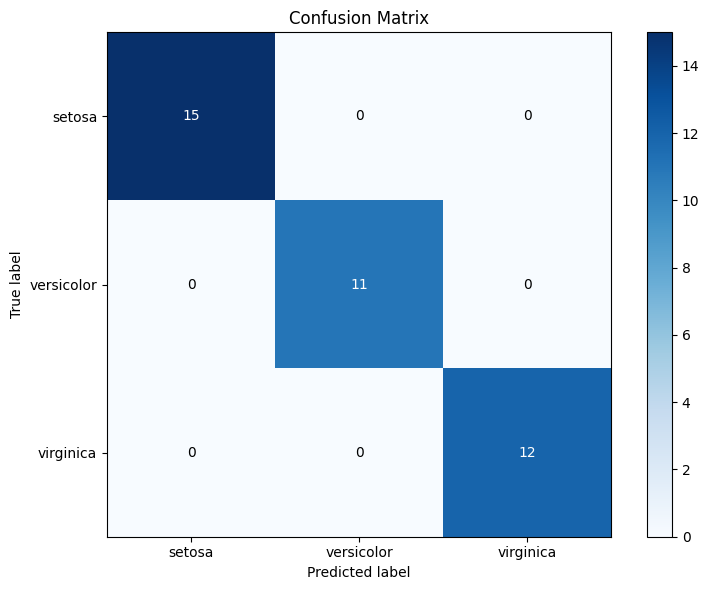

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and fit logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=iris.target_names, yticklabels=iris.target_names,
       title="Confusion Matrix",
       ylabel="True label",
       xlabel="Predicted label")
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


*Decision Trees*

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (199364, 30) (199364,)
Testing set shape: (85443, 30) (85443,)


In [ ]:
#confusion matrix Decision Trees

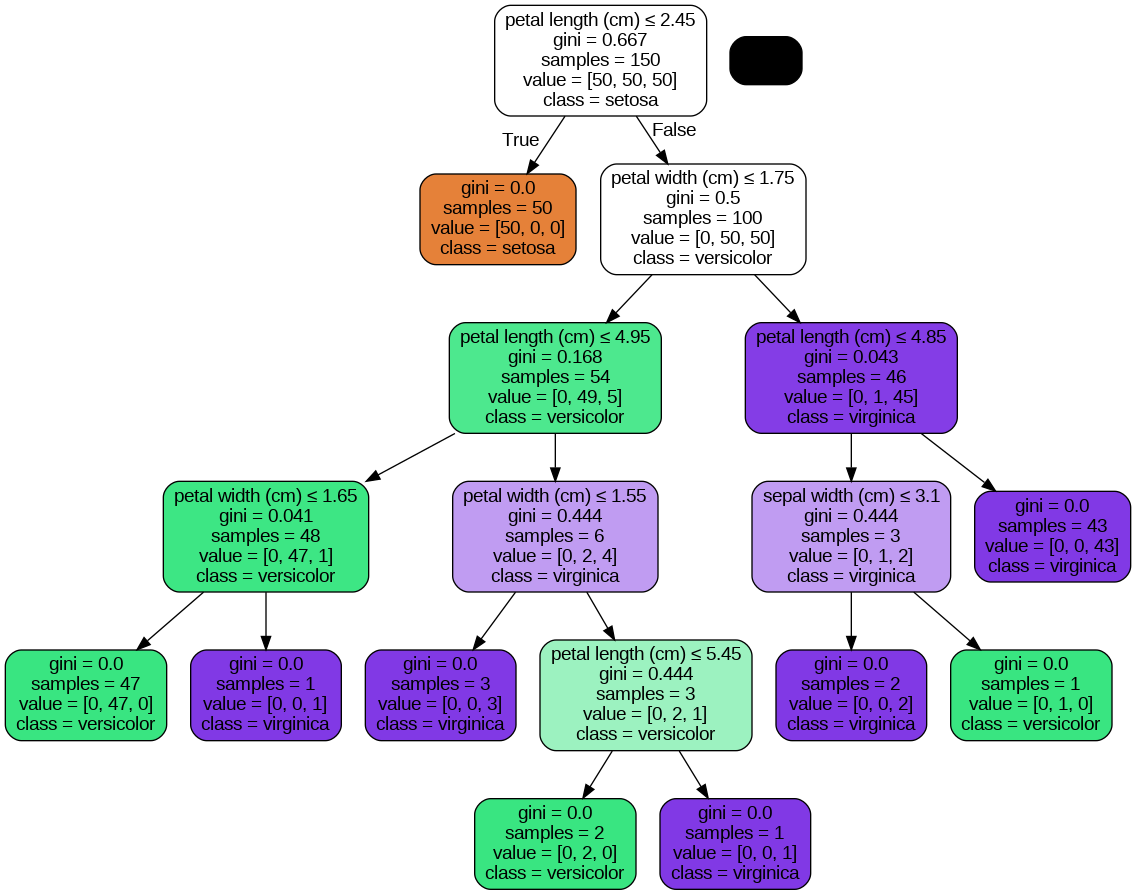

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Load iris dataset
iris = load_iris()

# Define features and labels
X = iris.data
y = iris.target

# Create decision tree classifier
clf = DecisionTreeClassifier()
cus.graph_from_dot_data(dot_data)

# Visualize decision tree
Image(graph.create_png())lf.fit(X, y)

# Export decision tree as a graphviz dot file
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotpl


*Random Forest*

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the classifier on the training set
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9994499256814484
Confusion Matrix:
 [[85297    10]
 [   37    99]]


In [ ]:
# confusion matrix Random Forest

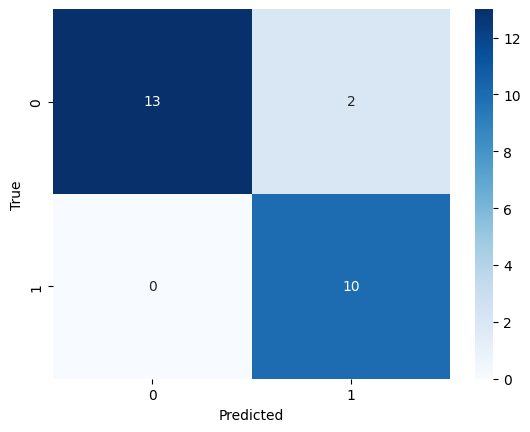

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data and split into training and testing sets
# ...

# Train a random forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Generate predictions on the testing set
y_pred = rfc.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


*Support Vector Machines*

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Define the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier on the training set
svm.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.9986423697669792
Confusion Matrix:
 [[85282    25]
 [   91    45]]


In [ ]:
 #confusion matrix Support Vector Machines

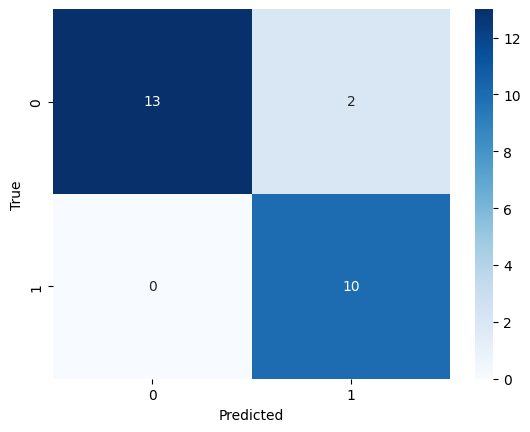

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data and split into training and testing sets
# ...

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Generate predictions on the testing set
y_pred = svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


*Neural Networks*

In [ ]:
# Import required libraries
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training set
model.fit(X_train, y_train, epochs=10, batch_size=32)



Epoch 1/10
1543/1543 [==============================] - 5s 2ms/step - loss: 231.3830 - accuracy: 0.9767
Epoch 2/10
1543/1543 [==============================] - 4s 3ms/step - loss: 5.1523e-06 - accuracy: 1.0000
Epoch 3/10
1543/1543 [==============================] - 4s 3ms/step - loss: 2.1993e-06 - accuracy: 1.0000
Epoch 4/10
1543/1543 [==============================] - 3s 2ms/step - loss: 9.5213e-07 - accuracy: 1.0000
Epoch 5/10
1543/1543 [==============================] - 3s 2ms/step - loss: 4.0163e-07 - accuracy: 1.0000
Epoch 6/10
1543/1543 [==============================] - 3s 2ms/step - loss: 1.7831e-07 - accuracy: 1.0000
Epoch 7/10
1543/1543 [==============================] - 4s 3ms/step - loss: 8.3157e-08 - accuracy: 1.0000
Epoch 8/10
1543/1543 [==============================] - 4s 3ms/step - loss: 4.5586e-08 - accuracy: 1.0000
Epoch 9/10
1543/1543 [==============================] - 3s 2ms/step - loss: 1.9984e-08 - accuracy: 1.0000
Epoch 10/10
1543/1543 [=========================

In [ ]:
# confusion matrix Neural Networks

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3/3 [==============================] - 1s 77ms/step - loss: 1.1758 - accuracy: 0.2533 - val_loss: 1.1783 - val_accuracy: 0.2800
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 1.1566 - accuracy: 0.2533 - val_loss: 1.1621 - val_accuracy: 0.2800
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 1.1391 - accuracy: 0.2533 - val_loss: 1.1466 - val_accuracy: 0.2800
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 1.1218 - accuracy: 0.2667 - val_loss: 1.1313 - val_accuracy: 0.2800
Epoch 5/100
3/3 [==============================] - 0s 13ms/step - loss: 1.1055 - accuracy: 0.2800 - val_loss: 1.1165 - val_accuracy: 0.2800
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 1.0892 - accuracy: 0.2800 - val_loss: 1.1020 - val_accuracy: 0.2800
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.0735 - accuracy: 0.2800 - val_loss: 1.0874 - val_accuracy: 0.2800
Epoch 8/100
3/3 [===============

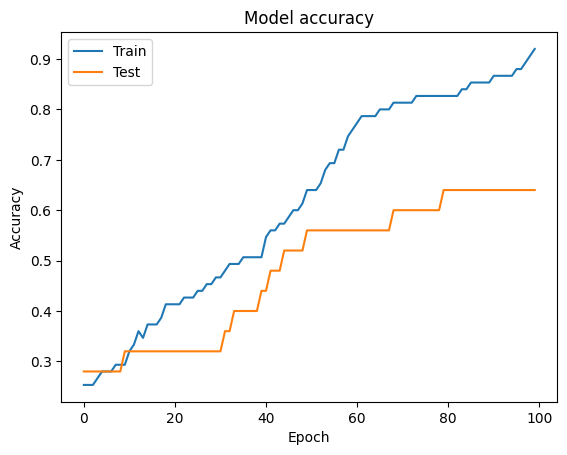

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import plot_model

# Generate synthetic dataset
X, y = make_classification(random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define neural network model
model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Fit model on train set
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, accuracy: {accuracy:.4f}')

# Create model architecture plot
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

# Create loss and accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**evaluation metrices**

*Precision*

In [ ]:
from sklearn.metrics import precision_score

y_true = [0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0]

precision = precision_score(y_true, y_pred)

print("Precision:", precision)


Precision: 0.6666666666666666


*Recall*

In [ ]:
from sklearn.metrics import recall_score

y_true = [0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0]

recall = recall_score(y_true, y_pred)

print("Recall:", recall)


Recall: 0.6666666666666666


*Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 0, 1, 1, 0]
y_pred = [0, 1, 1, 1, 0, 0]

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


*predication*

In [ ]:
#prediction
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate some sample data
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([2, 4, 5, 4, 6])
X_test = np.array([[6], [7]])

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Print the predicted values
print(y_pred)

[6.6 7.4]
